In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

In [92]:
df = pd.read_csv('healthcare.csv')

In [93]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [83]:
data_description = pd.read_csv('train_data_dictionary.csv')

In [84]:
data_description

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [5]:
df.shape

(318438, 18)

In [6]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [94]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [95]:
len(df['patientid'].unique()) # number of patients

92017

In [96]:
len(df['Hospital_code'].unique()) # number of hospitals

32

In [97]:
df['Bed Grade'].fillna(df['Bed Grade'].mode()[0],inplace = True)

In [98]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0],inplace = True)

In [99]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [100]:
df['Stay'].value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

<AxesSubplot:>

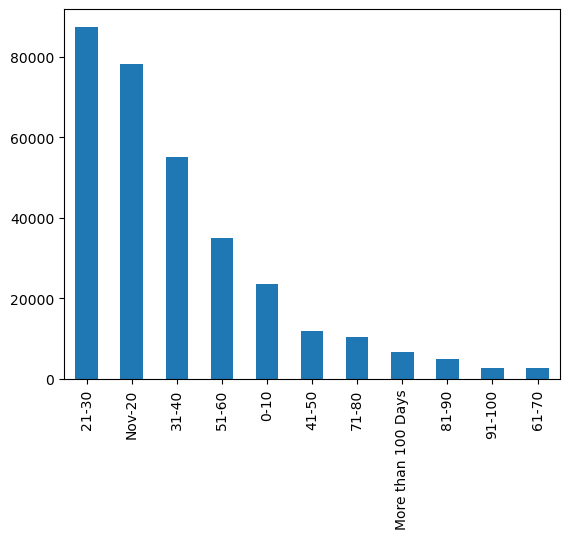

In [101]:
df['Stay'].value_counts().plot(kind = 'bar')

In [102]:
df['Stay'].replace({'More than 100 Days':'>100','Nov-20':'11-20'},inplace = True)

In [103]:
df['Age'].replace({'Nov-20':'11-20'},inplace = True)

<AxesSubplot:>

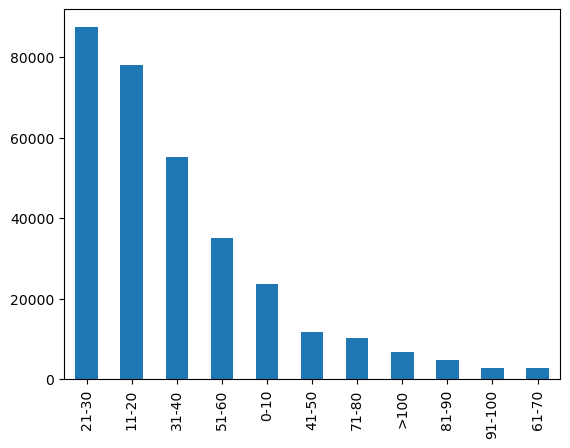

In [104]:
df['Stay'].value_counts().plot(kind = 'bar')

In [18]:
#Department, type of admission, #severity of illness, age against stay

In [19]:
init_analysis = df[['Department','Type of Admission','Severity of Illness','Age']].columns.to_list()

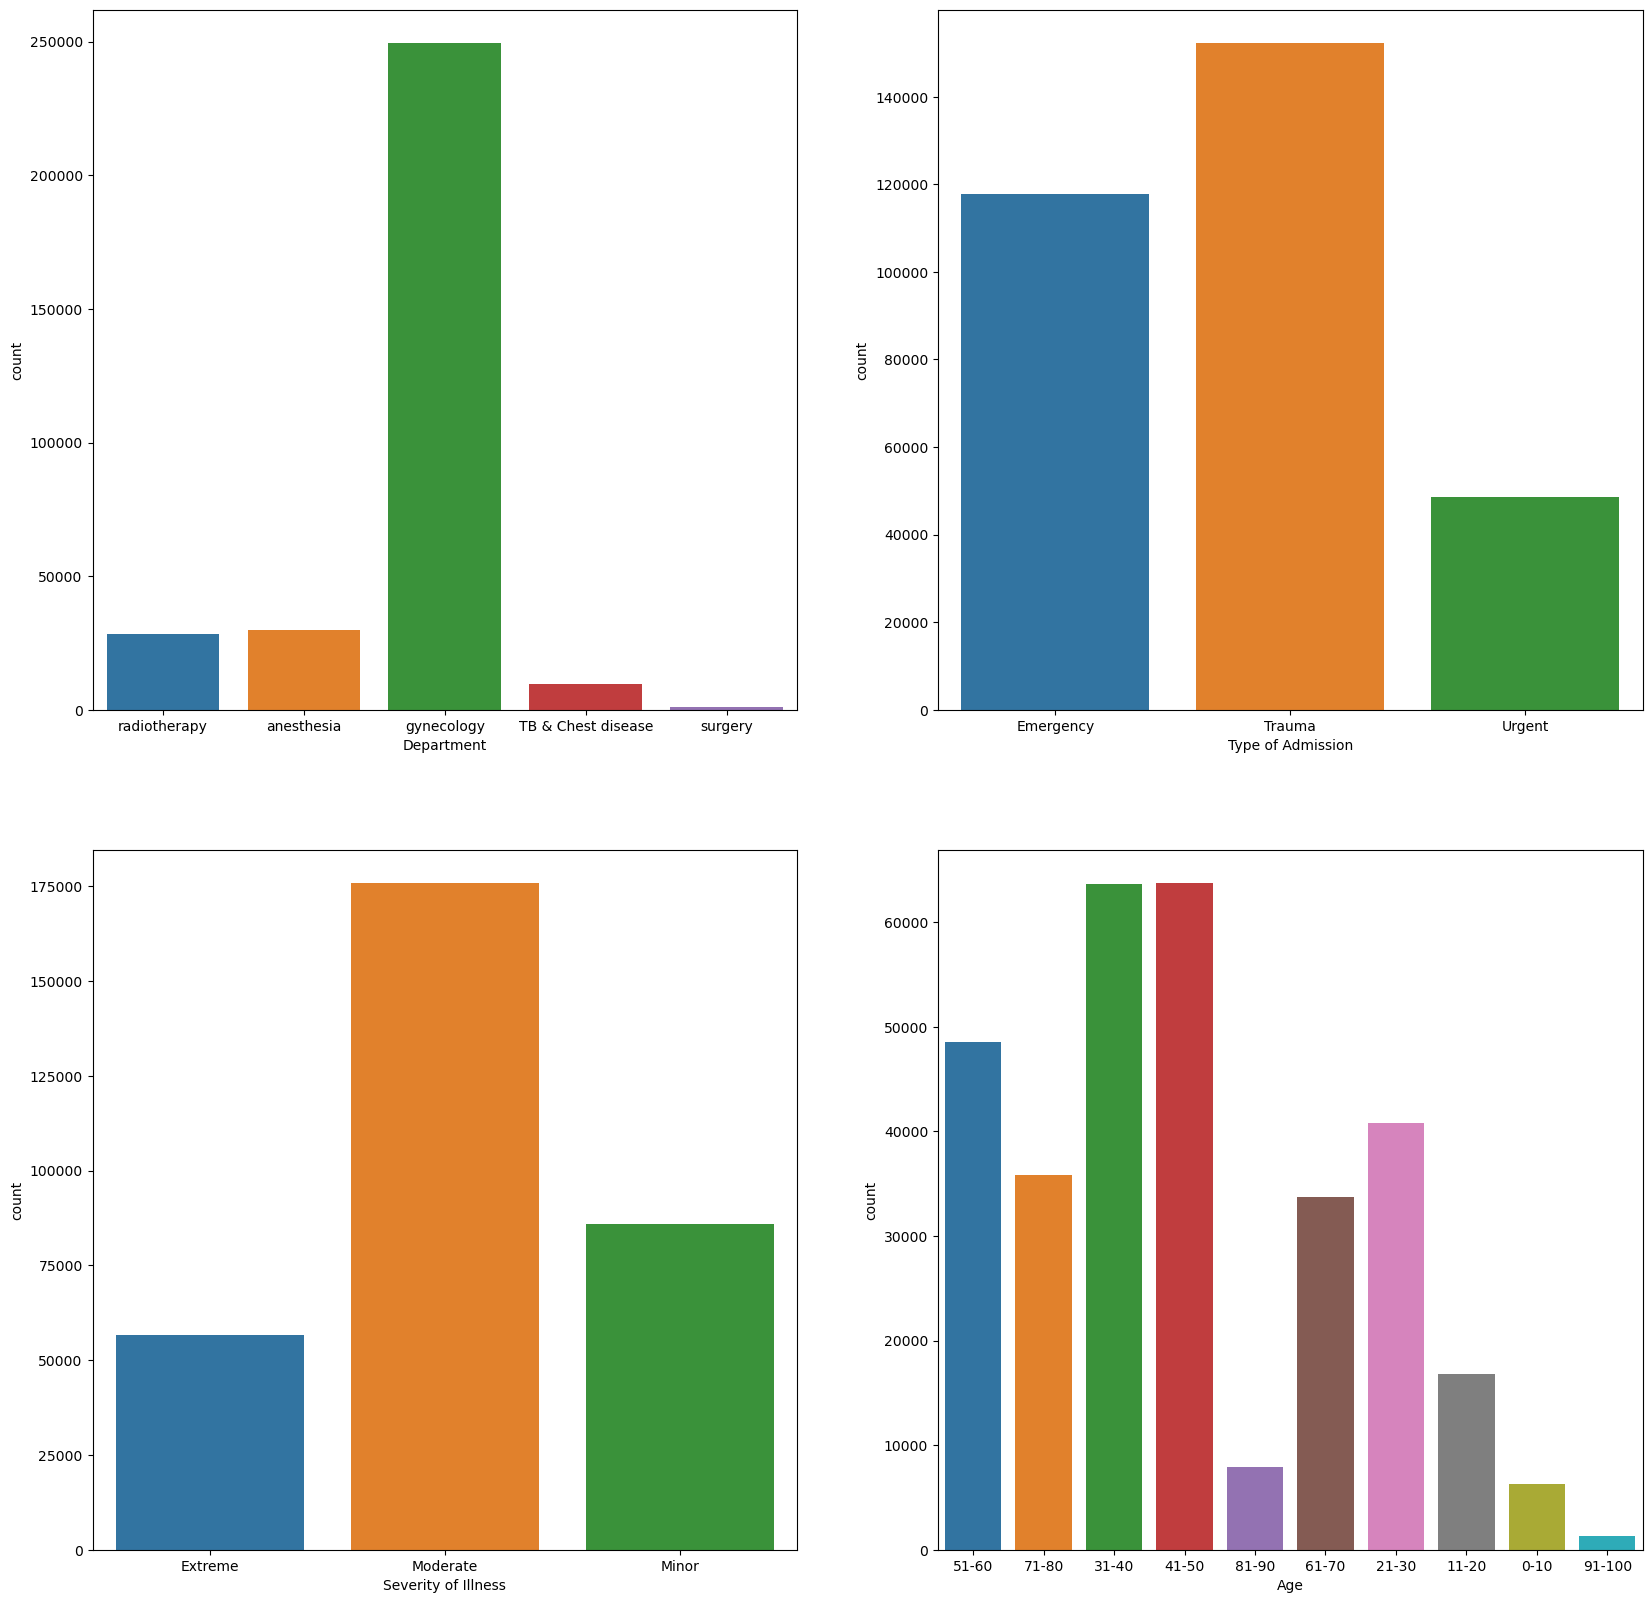

In [20]:
fig,ax = plt.subplots(2,2,figsize = (20,20))
for i,j in zip(init_analysis,ax.flatten()):
    sns.countplot(df[i],ax = j)
plt.show()

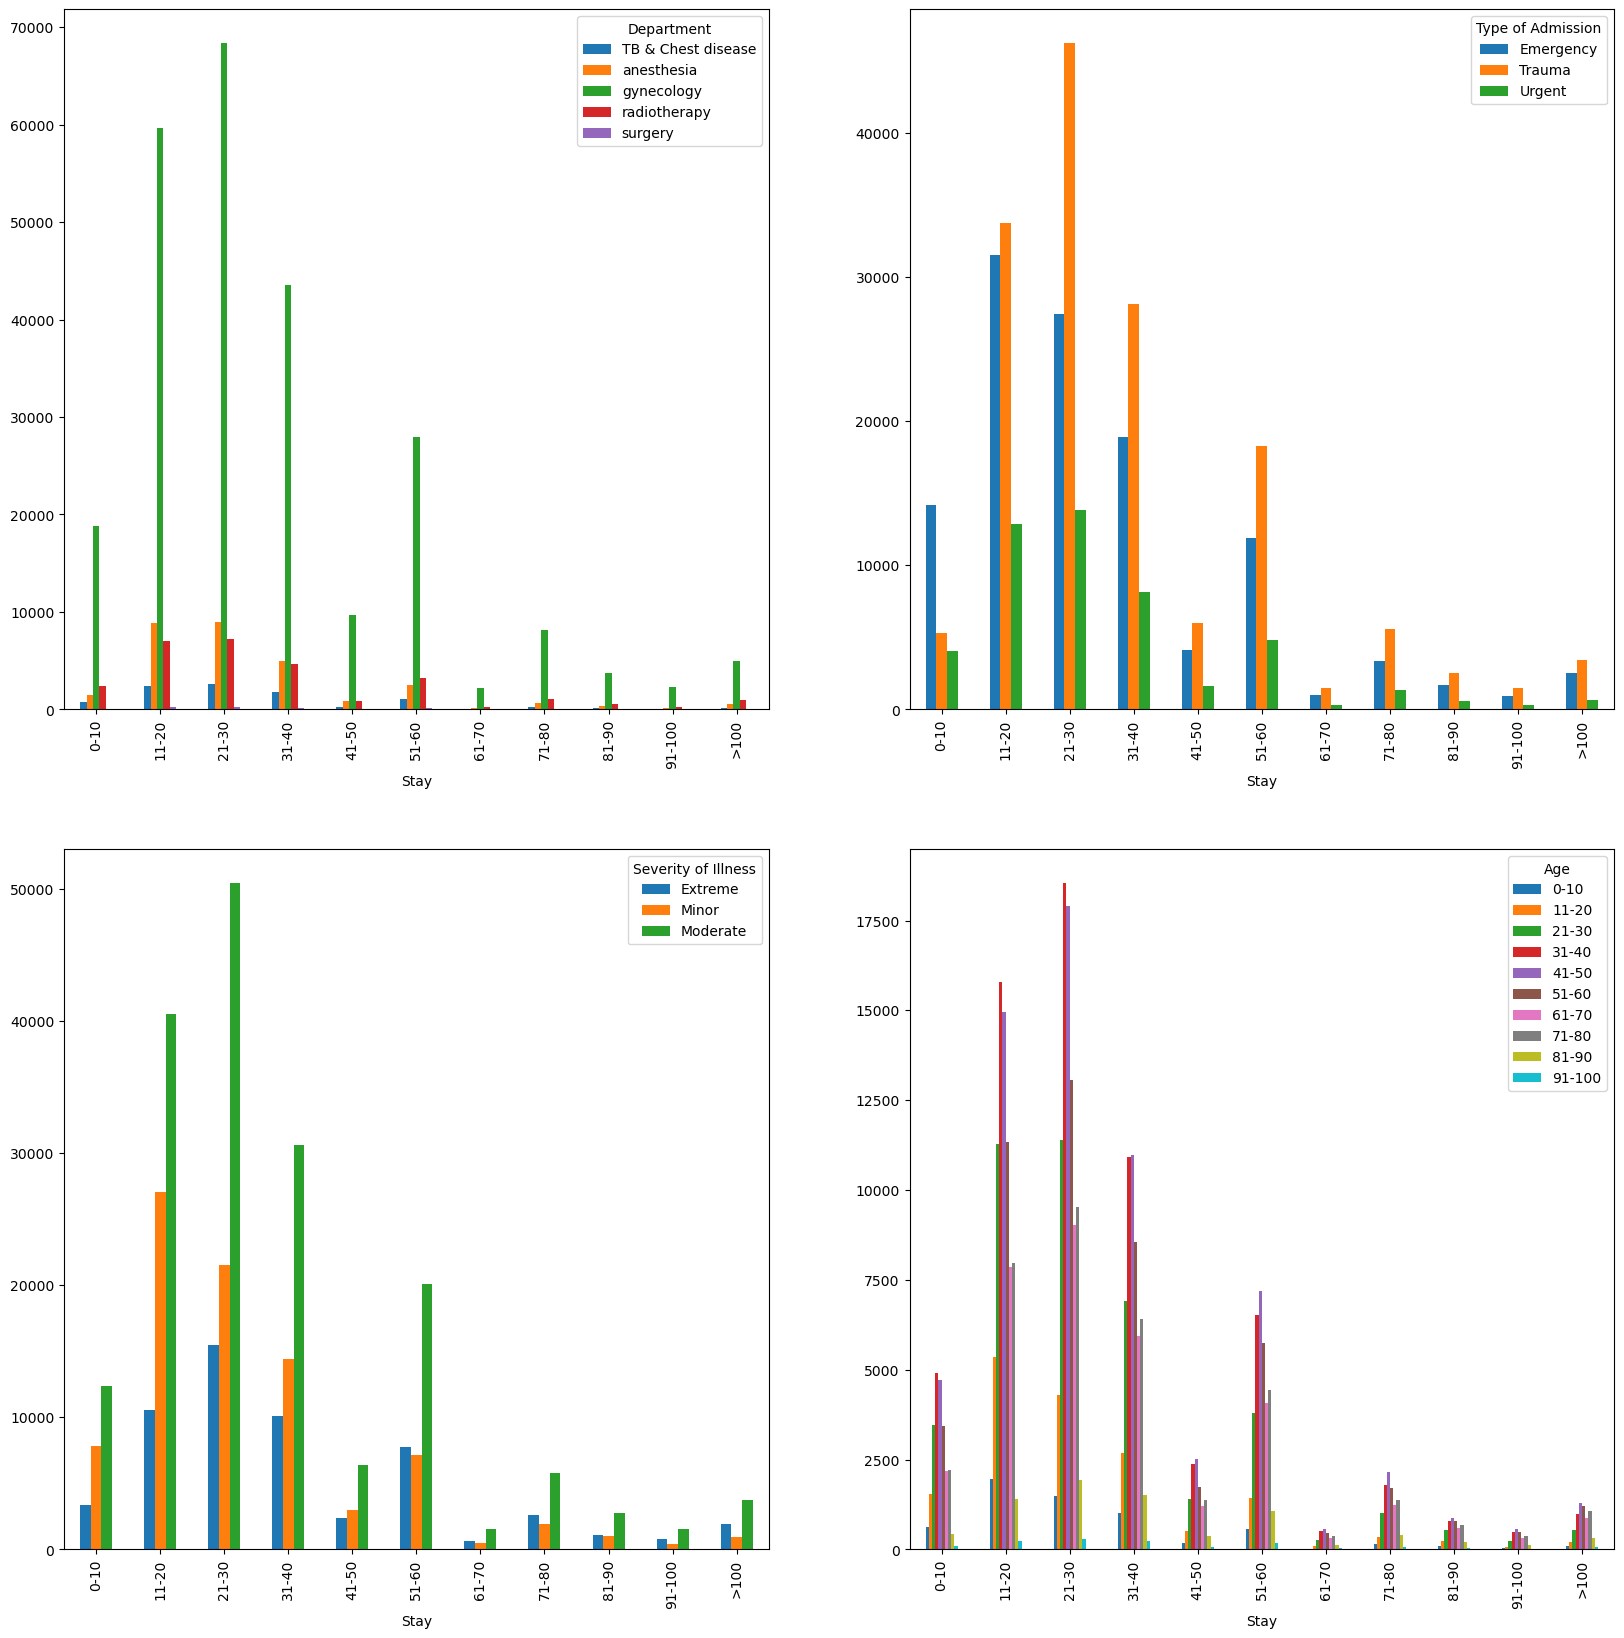

In [21]:
fig,ax = plt.subplots(2,2,figsize = (20,20))
for i,j in zip(init_analysis,ax.flatten()):
    pd.crosstab(df['Stay'],df[i]).plot(kind = 'bar',ax = j)
plt.show()

<AxesSubplot:xlabel='Stay'>

<Figure size 2000x2000 with 0 Axes>

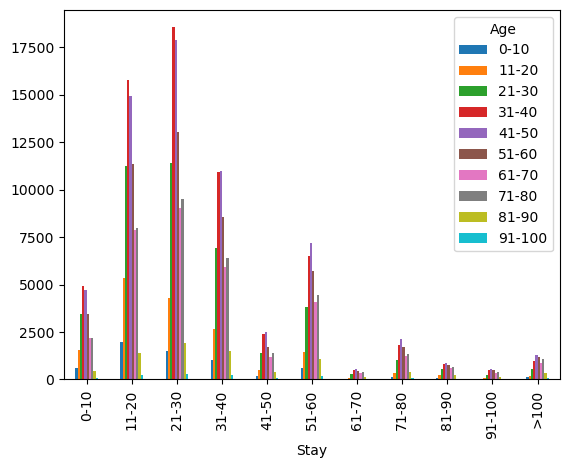

In [22]:
plt.figure(figsize = (20,20))
pd.crosstab(df['Stay'],df['Age']).plot(kind = 'bar')

In [105]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

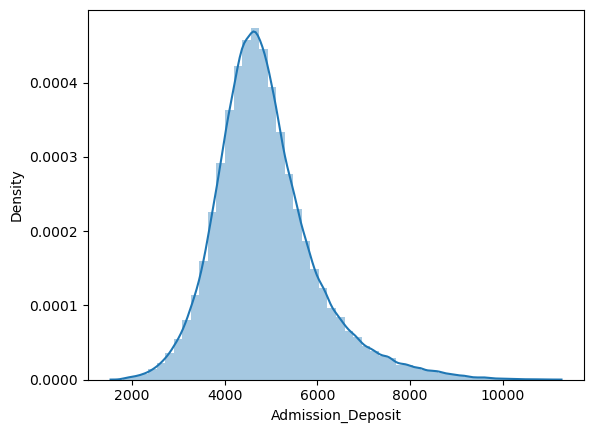

In [106]:
sns.distplot(df['Admission_Deposit'])

<AxesSubplot:xlabel='Stay', ylabel='Admission_Deposit'>

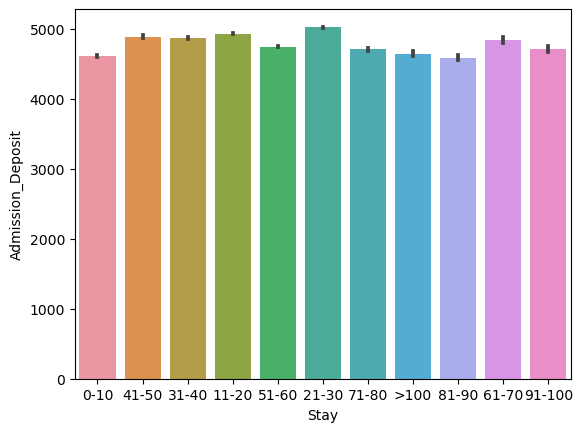

In [107]:
sns.barplot(df['Stay'],df['Admission_Deposit'])

In [108]:
len(df['City_Code_Hospital'].value_counts())

11

<AxesSubplot:>

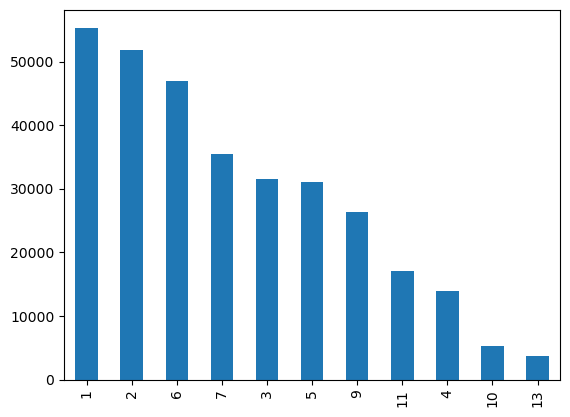

In [109]:
df['City_Code_Hospital'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Stay'>

<Figure size 2000x3000 with 0 Axes>

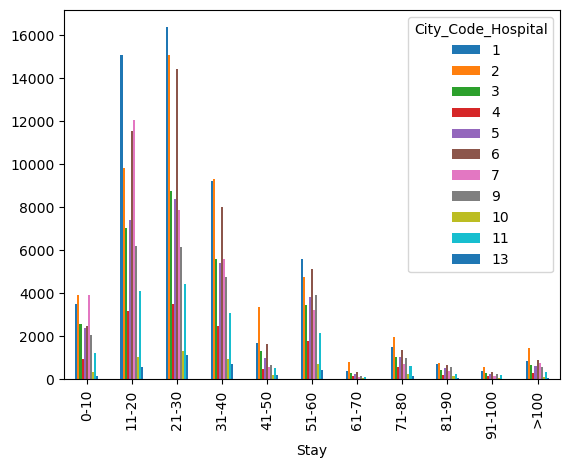

In [110]:
plt.figure(figsize = (20,30))
pd.crosstab(df['Stay'],df['City_Code_Hospital']).plot(kind = 'bar')

In [145]:
df['City_Code_Patient'].value_counts()

8.0     128543
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [139]:
df.groupby(['City_Code_Patient','Stay'])['case_id'].count()[0:11]

City_Code_Patient  Stay  
1.0                0-10      1859
                   11-20     6544
                   21-30     7720
                   31-40     4514
                   41-50      733
                   51-60     3064
                   61-70      172
                   71-80      737
                   81-90      386
                   91-100     194
                   >100       454
Name: case_id, dtype: int64

In [140]:
df.groupby(['City_Code_Patient','Stay'])['case_id'].count()[12:24]

City_Code_Patient  Stay  
2.0                11-20     10193
                   21-30     11883
                   31-40      6376
                   41-50      1130
                   51-60      4377
                   61-70       199
                   71-80       940
                   81-90       523
                   91-100      248
                   >100        554
3.0                0-10        233
                   11-20       751
Name: case_id, dtype: int64

In [111]:
df_1 = df.copy()

In [112]:
cat = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type',
 'Ward_Facility_Code','Type of Admission','Severity of Illness','Age']

In [113]:
le = LabelEncoder()
for i in cat:
    df_1[i] = le.fit_transform(df_1[i])

In [114]:
df_1.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558,41-50


In [115]:
x_base = df_1.drop(['case_id','patientid','Stay'],axis = 1)
y_base = df_1['Stay']

In [116]:
xtrain_base,xtest_base,ytrain_base,ytest_base = train_test_split(x_base,y_base,train_size=0.70,random_state = 100)

In [117]:
dt_base = DecisionTreeClassifier()
model_base = dt_base.fit(xtrain_base,ytrain_base)
ypred_base = model_base.predict(xtest_base)

In [118]:
print(classification_report(ypred_base,ytest_base))

              precision    recall  f1-score   support

        0-10       0.19      0.19      0.19      7190
       11-20       0.34      0.34      0.34     23184
       21-30       0.38      0.39      0.38     25568
       31-40       0.25      0.25      0.25     16742
       41-50       0.06      0.06      0.06      3802
       51-60       0.30      0.30      0.30     10490
       61-70       0.03      0.03      0.03       899
       71-80       0.15      0.14      0.15      3138
       81-90       0.21      0.20      0.20      1546
      91-100       0.09      0.08      0.09       897
        >100       0.34      0.33      0.34      2076

    accuracy                           0.30     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.30      0.29     95532



In [30]:
x_sig = df_1[['Department','Type of Admission','Severity of Illness','Age']]
y_sig = df_1['Stay']

In [31]:
xtrain_sig,xtest_sig,ytrain_sig,ytest_sig = train_test_split(x_sig,y_sig,train_size=0.70,random_state = 100)

In [32]:
dt_sig = DecisionTreeClassifier()
model_sig = dt_sig.fit(xtrain_sig,ytrain_sig)
ypred_sig = model_sig.predict(xtest_sig)

In [33]:
print(classification_report(ypred_sig,ytest_sig))

              precision    recall  f1-score   support

        0-10       0.00      0.19      0.00        83
       11-20       0.57      0.29      0.39     45819
       21-30       0.56      0.30      0.39     48939
       31-40       0.01      0.18      0.01       611
       41-50       0.00      0.00      0.00         0
       51-60       0.00      0.22      0.00        64
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.00      0.00         4
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.33      0.00         3
        >100       0.00      0.44      0.00         9

    accuracy                           0.30     95532
   macro avg       0.10      0.18      0.07     95532
weighted avg       0.56      0.30      0.39     95532



In [34]:
rf_base = RandomForestClassifier()

In [35]:
x_rf = df_1.drop(['case_id','patientid','Stay'],axis = 1)
y_rf = df_1['Stay']

xtrain_rf,xtest_rf,ytrain_rf,ytest_rf = train_test_split(x_rf,y_rf,train_size=0.70,random_state = 100)

model_rf = rf_base.fit(xtrain_rf,ytrain_rf)
ypred_rf = model_rf.predict(xtest_rf)

print(classification_report(ypred_rf,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.19      0.30      0.23      4459
       11-20       0.44      0.39      0.41     26731
       21-30       0.53      0.41      0.46     33846
       31-40       0.26      0.33      0.29     13414
       41-50       0.02      0.07      0.03       953
       51-60       0.45      0.38      0.41     12308
       61-70       0.02      0.11      0.03       149
       71-80       0.09      0.26      0.14      1070
       81-90       0.19      0.38      0.25       738
      91-100       0.05      0.23      0.08       182
        >100       0.43      0.51      0.47      1682

    accuracy                           0.38     95532
   macro avg       0.24      0.31      0.26     95532
weighted avg       0.43      0.38      0.40     95532



In [36]:
x_sig_rf = df_1[['Department','Type of Admission','Severity of Illness','Age']]
y_sig_rf = df_1['Stay']

xtrain_sig_rf,xtest_sig_rf,ytrain_sig_rf,ytest_sig_rf = train_test_split(x_sig_rf,y_sig_rf,train_size=0.70,random_state = 100)

rf_sig = RandomForestClassifier()
model_sig_rf = rf_sig.fit(xtrain_sig_rf,ytrain_sig_rf)
ypred_sig_rf = model_sig_rf.predict(xtest_sig_rf)

print(classification_report(ypred_sig_rf,ytest_sig_rf))

              precision    recall  f1-score   support

        0-10       0.00      0.17      0.00        65
       11-20       0.57      0.29      0.39     45620
       21-30       0.56      0.30      0.39     49076
       31-40       0.01      0.18      0.01       632
       41-50       0.00      0.00      0.00         1
       51-60       0.00      0.24      0.01       118
       61-70       0.00      0.00      0.00         0
       71-80       0.00      0.00      0.00         4
       81-90       0.00      0.00      0.00         0
      91-100       0.00      0.33      0.00         3
        >100       0.00      0.31      0.00        13

    accuracy                           0.30     95532
   macro avg       0.10      0.17      0.07     95532
weighted avg       0.56      0.30      0.39     95532



In [37]:
dt_base.feature_importances_

array([0.04741696, 0.01842773, 0.0227183 , 0.00960552, 0.07190966,
       0.04201579, 0.04827975, 0.01550515, 0.04073518, 0.09534862,
       0.02347509, 0.0435172 , 0.08026722, 0.11683971, 0.32393813])

In [38]:
features = pd.DataFrame({'Columns':xtrain_base.columns,'Importance':dt_base.feature_importances_})

In [39]:
features.sort_values(by = 'Importance',ascending = False)

,Columns,Importance
14,Admission_Deposit,0.323938
13,Age,0.116840
9,City_Code_Patient,0.095349
12,Visitors with Patient,0.080267
4,Available Extra Rooms in Hospital,0.071910
6,Ward_Type,0.048280
0,Hospital_code,0.047417
11,Severity of Illness,0.043517
5,Department,0.042016
8,Bed Grade,0.040735


In [46]:
important = features[features['Importance']>=0.07]['Columns'].to_list()

In [47]:
x_imp = df_1[important]
y_imp = df_1['Stay']

In [51]:
xtrain_imp,xtest_imp,ytrain_imp,ytest_imp = train_test_split(x_imp,y_imp,train_size=0.70,random_state = 100)

dt_imp = DecisionTreeClassifier()
model_imp = dt_imp.fit(xtrain_imp,ytrain_imp)
ypred_imp = model_imp.predict(xtest_imp)

print(classification_report(ypred_imp,ytest_imp))

              precision    recall  f1-score   support

        0-10       0.14      0.12      0.13      7825
       11-20       0.31      0.29      0.30     24533
       21-30       0.34      0.34      0.34     25796
       31-40       0.20      0.21      0.20     15850
       41-50       0.05      0.05      0.05      3317
       51-60       0.24      0.24      0.24     10114
       61-70       0.01      0.01      0.01       751
       71-80       0.09      0.09      0.09      3032
       81-90       0.12      0.12      0.12      1427
      91-100       0.04      0.04      0.04       894
        >100       0.25      0.25      0.25      1993

    accuracy                           0.25     95532
   macro avg       0.16      0.16      0.16     95532
weighted avg       0.25      0.25      0.25     95532



In [52]:
x_imp_rf = df_1[important]
y_imp_rf = df_1['Stay']

xtrain_imp_rf,xtest_imp_rf,ytrain_imp_rf,ytest_imp_rf = train_test_split(x_imp_rf,y_imp_rf,train_size=0.70,random_state = 100)

rf_imp = RandomForestClassifier()
model_rf_imp = rf_imp.fit(xtrain_imp_rf,ytrain_imp_rf)
ypred_rf_imp = model_rf_imp.predict(xtest_imp_rf)

print(classification_report(ypred_rf_imp,ytest_imp_rf))

              precision    recall  f1-score   support

        0-10       0.13      0.13      0.13      6803
       11-20       0.31      0.30      0.30     24140
       21-30       0.36      0.35      0.36     27135
       31-40       0.20      0.21      0.20     16249
       41-50       0.05      0.06      0.05      2955
       51-60       0.27      0.26      0.26     10896
       61-70       0.02      0.02      0.02       636
       71-80       0.08      0.09      0.09      2723
       81-90       0.12      0.15      0.14      1218
      91-100       0.03      0.04      0.03       694
        >100       0.32      0.30      0.31      2083

    accuracy                           0.26     95532
   macro avg       0.17      0.17      0.17     95532
weighted avg       0.27      0.26      0.27     95532



In [53]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
df['Stay'].value_counts()

21-30     87491
11-20     78139
31-40     55159
51-60     35018
0-10      23604
41-50     11743
71-80     10254
>100       6683
81-90      4838
91-100     2765
61-70      2744
Name: Stay, dtype: int64

In [75]:
sampling = {'41-50':18743,'71-80':17254,'91-100':12765,'61-70':12644,'>100':9993,'81-90':8893}
oversampler = RandomOverSampler(sampling_strategy= sampling)
x_resampled, y_resampled = oversampler.fit_resample(xtrain_base,ytrain_base)

<AxesSubplot:>

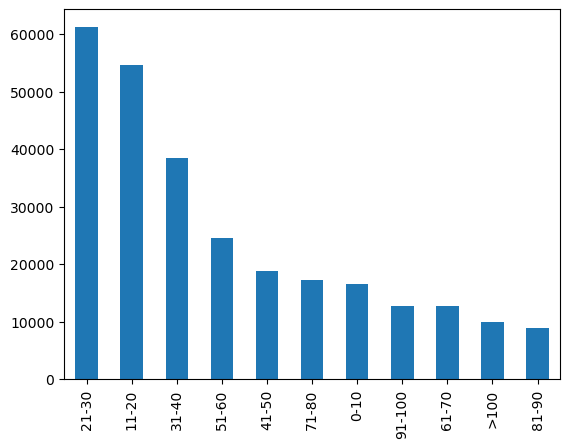

In [65]:
y_resampled.value_counts().plot(kind = 'bar')

In [70]:
model_bal = dt_base.fit(x_resampled, y_resampled)
ypred_bal = model_bal.predict(xtest_base)

print(classification_report(ypred_bal,ytest_base))

              precision    recall  f1-score   support

        0-10       0.18      0.18      0.18      6987
       11-20       0.33      0.34      0.34     22952
       21-30       0.38      0.39      0.38     25674
       31-40       0.24      0.25      0.24     16306
       41-50       0.06      0.05      0.06      4102
       51-60       0.30      0.30      0.30     10503
       61-70       0.04      0.03      0.03      1054
       71-80       0.14      0.13      0.13      3322
       81-90       0.22      0.21      0.21      1495
      91-100       0.09      0.07      0.08      1002
        >100       0.34      0.32      0.33      2135

    accuracy                           0.29     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.29      0.29     95532



In [71]:
model_rf_bal = rf_base.fit(x_resampled, y_resampled)
ypred_rf_bal = model_rf_bal.predict(xtest_rf)

print(classification_report(ypred_rf_bal,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.18      0.30      0.23      4295
       11-20       0.44      0.39      0.41     26254
       21-30       0.53      0.41      0.46     33480
       31-40       0.26      0.33      0.29     12810
       41-50       0.04      0.07      0.05      1713
       51-60       0.41      0.39      0.40     11166
       61-70       0.03      0.07      0.04       365
       71-80       0.14      0.22      0.17      1960
       81-90       0.26      0.33      0.29      1171
      91-100       0.08      0.16      0.11       422
        >100       0.45      0.46      0.46      1896

    accuracy                           0.38     95532
   macro avg       0.26      0.29      0.26     95532
weighted avg       0.41      0.38      0.39     95532



In [76]:
oversampler = RandomOverSampler(sampling_strategy= 'auto')
x_resampled_1, y_resampled_1 = oversampler.fit_resample(xtrain_base,ytrain_base)

In [77]:
y_resampled_1.value_counts()

11-20     61232
0-10      61232
71-80     61232
21-30     61232
51-60     61232
31-40     61232
61-70     61232
>100      61232
41-50     61232
81-90     61232
91-100    61232
Name: Stay, dtype: int64

In [78]:
model_bal_1 = dt_base.fit(x_resampled_1, y_resampled_1)
ypred_bal_1 = model_bal_1.predict(xtest_base)

print(classification_report(ypred_bal_1,ytest_base))

              precision    recall  f1-score   support

        0-10       0.19      0.18      0.19      7235
       11-20       0.33      0.34      0.34     22702
       21-30       0.37      0.38      0.38     25249
       31-40       0.24      0.24      0.24     16470
       41-50       0.07      0.06      0.06      4000
       51-60       0.31      0.30      0.30     10693
       61-70       0.04      0.03      0.03       934
       71-80       0.15      0.13      0.14      3457
       81-90       0.24      0.22      0.23      1593
      91-100       0.09      0.07      0.08      1046
        >100       0.33      0.30      0.31      2153

    accuracy                           0.29     95532
   macro avg       0.21      0.21      0.21     95532
weighted avg       0.29      0.29      0.29     95532



In [79]:
model_rf_bal_1 = rf_base.fit(x_resampled_1, y_resampled_1)
ypred_rf_bal_1 = model_rf_bal_1.predict(xtest_rf)

print(classification_report(ypred_rf_bal_1,ytest_rf))

              precision    recall  f1-score   support

        0-10       0.26      0.25      0.26      7234
       11-20       0.41      0.39      0.40     24369
       21-30       0.47      0.42      0.44     29826
       31-40       0.25      0.31      0.28     13360
       41-50       0.04      0.07      0.05      2083
       51-60       0.46      0.37      0.41     13176
       61-70       0.03      0.09      0.05       313
       71-80       0.13      0.23      0.17      1807
       81-90       0.25      0.33      0.28      1123
      91-100       0.08      0.21      0.12       330
        >100       0.45      0.46      0.45      1911

    accuracy                           0.36     95532
   macro avg       0.26      0.28      0.26     95532
weighted avg       0.38      0.36      0.37     95532



In [143]:
x_sig_1 = df_1[['Department','Type of Admission','Severity of Illness','Age','City_Code_Patient','City_Code_Hospital']]
y_sig_1 = df_1['Stay']

xtrain_sig_1,xtest_sig_1,ytrain_sig_1,ytest_sig_1 = train_test_split(x_sig_1,y_sig_1,train_size=0.70,random_state = 100)

dt_sig_1 = DecisionTreeClassifier()
model_sig_1 = dt_sig_1.fit(xtrain_sig_1,ytrain_sig_1)
ypred_sig_1 = model_sig_1.predict(xtest_sig_1)

print(classification_report(ypred_sig_1,ytest_sig_1))

              precision    recall  f1-score   support

        0-10       0.08      0.15      0.10      3660
       11-20       0.46      0.31      0.37     34376
       21-30       0.53      0.31      0.39     45810
       31-40       0.09      0.19      0.12      7309
       41-50       0.01      0.08      0.02       502
       51-60       0.05      0.17      0.07      2738
       61-70       0.00      0.04      0.01        68
       71-80       0.01      0.10      0.02       416
       81-90       0.01      0.11      0.02       174
      91-100       0.01      0.06      0.01        86
        >100       0.04      0.22      0.07       393

    accuracy                           0.29     95532
   macro avg       0.12      0.16      0.11     95532
weighted avg       0.43      0.29      0.34     95532



In [144]:
x_sig_1_rf = df_1[['Department','Type of Admission','Severity of Illness','Age','City_Code_Patient','City_Code_Hospital']]
y_sig_1_rf = df_1['Stay']

xtrain_sig_1_rf,xtest_sig_1_rf,ytrain_sig_1_rf,ytest_sig_1_rf = train_test_split(x_sig_1_rf,y_sig_1_rf,train_size=0.70,random_state = 100)

rf_sig_1 = RandomForestClassifier()
model_sig_1_rf = rf_sig_1.fit(xtrain_sig_1_rf,ytrain_sig_1_rf)
ypred_sig_1_rf = model_sig_1_rf.predict(xtest_sig_1_rf)

print(classification_report(ypred_sig_1_rf,ytest_sig_1_rf))

              precision    recall  f1-score   support

        0-10       0.05      0.16      0.08      2278
       11-20       0.43      0.32      0.36     31425
       21-30       0.55      0.31      0.39     47138
       31-40       0.10      0.19      0.13      8755
       41-50       0.02      0.08      0.03       614
       51-60       0.06      0.16      0.08      3690
       61-70       0.01      0.07      0.02       133
       71-80       0.02      0.11      0.04       604
       81-90       0.02      0.10      0.03       223
      91-100       0.01      0.06      0.02       143
        >100       0.05      0.20      0.08       529

    accuracy                           0.29     95532
   macro avg       0.12      0.16      0.11     95532
weighted avg       0.42      0.29      0.33     95532

